# Autism Screening on Adults

[dataset kaggle](https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults)

[UCL](https://archive.ics.uci.edu/dataset/426/autism+screening+adult)

Ref: `Thabtah,Fadi. (2017). Autism Screening Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5F019.`
BibTex:
 @misc{misc_autism_screening_adult_426,

  author       = {Thabtah,Fadi},

  title        = {{Autism Screening Adult}},

  year         = {2017},

  howpublished = {UCI Machine Learning Repository},
  
  note         = {{DOI}: https://doi.org/10.24432/C5F019}
}



[AQ10-Autism Spectrum Quotient (AQ) ](https://docs.autismresearchcentre.com/tests/AQ10.pdf)


| Feature           | Description                                                                                               |
|-------------------|-----------------------------------------------------------------------------------------------------------|
| index             | Número de identificação do participante                                                                   |
| AX_Score          | Pontuação com base na ferramenta de triagem de 10 itens do Espectro do Autismo (AQ-10)                   |
| age               | Idade em anos                                                                                             |
| gender            | Masculino ou Feminino                                                                                     |
| ethnicity         | Etnias em formato de texto                                                                                |
| jundice           | Se o participante nasceu com icterícia ou não                                                            |
| autism            | Se alguém da família imediata foi diagnosticado com autismo ou não                                      |
| country_of_res    | Países em formato de texto                                                                                |
| used_app_before   | Se o participante já usou um aplicativo de triagem                                                        |
| result            | Pontuação da ferramenta de triagem AQ-10                                                                  |
| age_desc          | Idade como categoria                                                                                      |
| relation          | Relação da pessoa que completou o teste                                                                   |
| Class/ASD         | Classificação do participante (ASD - Transtorno do Espectro Autista, Não ASD - Não tem Transtorno do Espectro Autista) |


Data: 2023-07-27

## Baixando os dados

In [ ]:
import pandas as pd

df = pd.read_csv('autism_screening.csv')
display(df)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [ ]:
# Informações  do atributo alvo Class/ASD
print("Atributo alvo: Class/ASD")
print("Valores possíveis: YES/NO")
print("Valores únicos: ", df['Class/ASD'].unique())
print("Quantidade de valores únicos: ", len(df['Class/ASD'].unique()))
print("Quantidade de valores: ", len(df['Class/ASD']))
print("Quantidade de valores YES: ", len(df[df['Class/ASD'] == 'YES']))
print("Quantidade de valores NO: ", len(df[df['Class/ASD'] == 'NO']))

Atributo alvo: Class/ASD
Valores possíveis: YES/NO
Valores únicos:  ['NO' 'YES']
Quantidade de valores únicos:  2
Quantidade de valores:  704
Quantidade de valores YES:  189
Quantidade de valores NO:  515


Análise do dataset usando  a ferramenta `ydata_profiling`.


[`Pandas-profiling`](https://pypi.org/project/pandas-profiling/) gera relatórios de perfil de um pandas `DataFrame`. Estender um `DataFrame` do pandas com `df.profile_report()` gerará automaticamente um relatório univariado e multivariado padronizado para compreensão dos dados.

In [ ]:
#pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df.head(705), title="Pandas Profiling Report (Triagem de Autismo em Adultos)") # gera report
profile.to_notebook_iframe() # Show report no notebook
profile.to_file("pandas_profiling_autism_screening.html") # salva report como uma página HTML

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Relatório Pandas Profiling para pré-processamento

1) Missing values: 2 em `age`
2) Outlier: `age` = 383 -> idade máxima
3) Linhas preenchidas com `?` em `ethnicity` e `relation` -> mudar para `unknowm`
4) Atributo `age_desc` é um valor constante -> Excluir
5) Atributos muito desbalanceados com  pouca importância para a classificação podem ser excluídos : `jundice`, `used_app_before` e `relation`


Resumo rápido dos tipos de dados presentes nas diferentes colunas do DataFrame

In [ ]:
pd.DataFrame(df.dtypes,
             columns = ["Data Type"])

,Data Type
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


### 1) Missing values (tratamento)
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0)): Nesta linha de código, estamos tratando valores ausentes na coluna 'age' do

DataFrame 'df'. O método fillna() é usado para preencher valores nulos com um valor específico. Aqui, estamos preenchendo os valores nulos da

coluna 'age' com a média dos valores não nulos da mesma coluna, arredondada para o número inteiro mais próximo.

df['age'].mean(): Calcula a média dos valores na coluna 'age'.

np.round(df['age'].mean(), 0): O resultado da média é arredondado para o número inteiro mais próximo.

In [ ]:
import numpy as np

# Verificar missing values
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.background_gradient(cmap = "Purples")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
# Organizando valores faltantes

df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.background_gradient(cmap = "Purples")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


## 2) Outlier tratamento

substituir `age==383` pela média idade

In [ ]:
# Verificando a linha da ocorrência do outlier em age

df[df['age'] == 383]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


In [ ]:
# Imprimir a idade máxima, mínima e a média

print('Idade máxima: ', df['age'].max())
print('Idade mínima: ', df['age'].min())
print('Média de idade: ', df['age'].mean())

Idade máxima:  383.0
Idade mínima:  17.0
Média de idade:  29.698863636363637


In [ ]:
# substituindo age==383 pela média de idade
df.loc[df['age'] == 383, 'age'] = df['age'].mean()

# Verificar idade máxima e idade mínima atualizada
print('Idade máxima: ', df['age'].max())
print('Idade mínima: ', df['age'].min())

#verificar a média de idade atualizada
print('Nova Média de idade: ', df['age'].mean())

Idade máxima:  64.0
Idade mínima:  17.0
Nova Média de idade:  29.197015431301654


## 3) Linhas preenchidas com `?` em `ethnicity` e `relation`

Substituir `?` por `unknowm`



In [ ]:
# Substituindo valor "?" nas colunas de etnia, relation  por "Unknown"

df['ethnicity'] = df['ethnicity'].replace('?', 'Unknown')
df['relation'] = df['relation'].replace('?', 'Unknown')

Gerar gráficos com as substituições

In [ ]:
import plotly.express as px

for col in ['ethnicity', 'relation']:
    fig = px.bar(df[col].value_counts(), orientation='h')
    fig.update_layout(title=f'{col}', xaxis_title='Count', yaxis_title=col)
    fig.show()


## 4) Atributo `age_desc` é um valor constante

Excluir a coluna `age_desc`

In [ ]:
import plotly.express as px

fig = px.bar(df['age_desc'].value_counts(), orientation='h', labels={'x': 'Count', 'y': 'age_desc'})
fig.update_layout(title='age_desc')
fig.show()


In [ ]:
# verificar
df['age_desc'].value_counts()

18 and more    704
Name: age_desc, dtype: int64

In [ ]:
# Excluir a coluna  do dataframe
df = df.drop(columns=['age_desc'])

# Verificar se a coluna foi excluída
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

## 5) Atributos muito desbalanceados com  pouca importância para a classificação

podem ser excluídos : `jundice`, `used_app_before` e `relation`

In [ ]:
# Excluir as colunas que não serão utilizadas na classificação
df = df.drop(columns=['jundice','used_app_before','result', 'relation'])

# Verificando se as colunas foram excluídas
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'austim', 'contry_of_res', 'Class/ASD'],
      dtype='object')

In [ ]:
# Salvar o dataframe pré-processado em arquivo csv
df.to_csv('autism_data_clean_Adulto.csv', index=False)

# Verificando o arquivo  salvo
df1= pd.read_csv('autism_data_clean_Adulto.csv')
df1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,austim,contry_of_res,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,United States,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,yes,Brazil,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,Spain,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,yes,United States,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Unknown,no,Egypt,NO


## Plotar alguns gráficos

In [ ]:
import plotly.express as px

top_15_ethnicities = df['contry_of_res'].value_counts().head(15)

fig = px.bar(x=top_15_ethnicities.values, y=top_15_ethnicities.index, orientation='h',
             labels={'x': 'Count', 'y': 'Country'}, title='Top 15 Ethnicities')

fig.show()


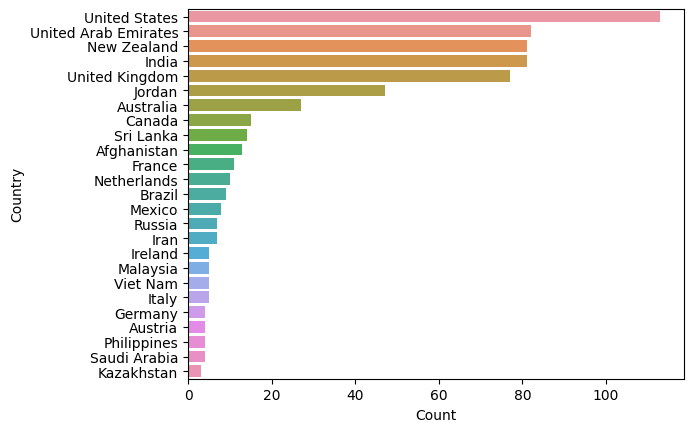

In [ ]:
# Gráfico de Etnias - mostra as 25 etnias mais presentes no dataset
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.barplot(y=df['contry_of_res'].value_counts().head(25).index,
                  x=df['contry_of_res'].value_counts().head(25).values)
fig.set(xlabel='Count', ylabel='Country')
plt.show()

In [ ]:
import plotly.express as px

colors = {'m': 'blue', 'f': 'red'}

for col in ['gender']:
    fig = px.bar(df[col].value_counts(), orientation='v', labels={'x': col, 'y': 'Count'},
                 color=df[col].value_counts().index.map(colors), color_discrete_map=colors) # color_discrete_sequence=['blue', 'red']
    fig.update_layout(title=f'{col}', showlegend=False)
    fig.show()


In [ ]:
import plotly.express as px

colors = {'NO': 'blue', 'YES': 'red'}

for col in ['Class/ASD']:
    fig = px.bar(df[col].value_counts(), orientation='v', color=df[col].value_counts().index.map(colors))
    fig.update_layout(title=f'{col}', xaxis_title=col, yaxis_title='Count', showlegend=False)
    fig.show()


### Verificar a idade e o gênero em relação a classificação (sim / Não)

In [ ]:
# Separar por faixa etária entre idade mínima (17) e idade máxima(64)
bins = [17, 27, 37, 47, 57, 67]
labels = ['17-26', '27-36', '37-46', '47-56', '57-66']


df['age'] = pd.cut(df['age'], bins=bins, labels=labels) #cria uma nova coluna com as faixas etárias

no_list = [] #armazena a quantidade de pessoas sem autismo
yes_list = [] #armazena a quantidade de pessoas com autismo


# Verifica a quantidade de pessoas com e sem autismo para cada idade
for element in list(df['age'].unique().dropna()):
    no = df[df['age'] == element]['Class/ASD'].value_counts()['NO'] #conta a quantidade de pessoas sem autismo
    yes = df[df['age'] == element]['Class/ASD'].value_counts()['YES'] #conta a quantidade de pessoas com autismo
    no_list.append(no) #adiciona a quantidade de pessoas sem autismo na lista
    yes_list.append(yes) #adiciona a quantidade de pessoas com autismo na lista

import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='NO', x=list(df['age'].unique().dropna()), y=no_list), #cria o gráfico de barras com a quantidade de pessoas sem autismo
    go.Bar(name='YES', x=list(df['age'].unique().dropna()), y=yes_list) #cria o gráfico de barras com a quantidade de pessoas com autismo
])

fig.update_layout(
    barmode='group',
    template='plotly_dark',
    xaxis_title="<b>Age-Buckets</b>",
    yaxis_title="<b>Class/ASD by Age Buckets</b>",
    title='Distribution of <i>Class/ASD</i> by "Age-Buckets"',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    )
fig.show()

# Verifica a quantidade de pessoas com e sem autismo para cada gênero
no_list = []
yes_list = []

for element in list(df['gender'].unique()):
    no = df[df['gender'] == element]['Class/ASD'].value_counts()['NO']
    yes = df[df['gender'] == element]['Class/ASD'].value_counts()['YES']
    no_list.append(no)
    yes_list.append(yes)

fig = go.Figure(data=[
    go.Bar(name='NO', x=list(df['gender'].unique()), y=no_list),
    go.Bar(name='YES', x=list(df['gender'].unique()), y=yes_list)
])

fig.update_layout(
    barmode='group',
    template='plotly_dark',
    xaxis_title="<b>Gender</b>",
    yaxis_title="<b>Class/ASD by Gender</b>",
    title='Distribution of <i>Class/ASD</i> by "Gender"',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    )
fig.show()

## Dataframe com os dados pré-processados

In [ ]:
import pandas as pd

# importar dataset
df = pd.read_csv('autism_data_clean_Adulto.csv')
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,austim,contry_of_res,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,United States,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,yes,Brazil,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,Spain,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,yes,United States,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Unknown,no,Egypt,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,f,White-European,no,Russia,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,m,Hispanic,no,Mexico,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,f,Unknown,no,Russia,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,m,South Asian,no,Pakistan,NO


In [ ]:
pd.DataFrame(df.dtypes,
             columns = ["Data Type"])

,Data Type
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


## Concatenar os dataframes

In [ ]:
# concatenar csv

import pandas as pd
import numpy as np

# importar csv
df1 = pd.read_csv('autism_data_clean_Adulto.csv')
df2 = pd.read_csv('autism_data_clean_Adolescente.csv')

# concatenar csv
df_concat = pd.concat([df1, df2], ignore_index=True)
df_concat

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,austim,contry_of_res,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,United States,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,yes,Brazil,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,Spain,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,yes,United States,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Unknown,no,Egypt,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0,1,1,1,0,1,1,0,1,0,16.0,f,'Middle Eastern ',no,Anguilla,NO
804,1,0,1,0,0,0,0,1,0,1,16.0,m,Asian,no,India,NO
805,1,0,0,1,1,1,1,1,1,1,12.0,f,White-European,no,'United Kingdom',YES
806,1,1,0,1,1,0,0,0,1,1,13.0,f,White-European,no,'United Kingdom',NO


In [ ]:
#salvar em csv o dataframe concatenado
df_concat.to_csv('Autism-Adult-Adolesc-Data.csv', index=False)

df_concat


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,austim,contry_of_res,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,United States,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,yes,Brazil,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,Spain,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,yes,United States,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Unknown,no,Egypt,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0,1,1,1,0,1,1,0,1,0,16.0,f,'Middle Eastern ',no,Anguilla,NO
804,1,0,1,0,0,0,0,1,0,1,16.0,m,Asian,no,India,NO
805,1,0,0,1,1,1,1,1,1,1,12.0,f,White-European,no,'United Kingdom',YES
806,1,1,0,1,1,0,0,0,1,1,13.0,f,White-European,no,'United Kingdom',NO
